In [1]:
# messing around with this idea: https://twitter.com/AlexKontorovich/status/1172715174786228224
# obviously it's not going to work but it's really fun anyways

In [32]:
def collatz(number):
    number = int(number)
    assert number > 0
    while True:
        while number & 1 == 0:
            number = number >> 1
        yield number
        if number == 1:
            break
        number = 3 * number + 1

In [24]:
cool_program = 887570260646934643447331259693373543698140232874500619768489156911
for number in collatz(cool_program):
    print(bin(number))

0b1000011011011001000001010100010001111010001101001010110011000110000100101111011010000100101111011010000100101111011010000100101111011010000100101111011010000100101111011010000100101111011010000100101111011010000100101111
0b1100101001000101100001111110011010110111010011110000001100101001000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111000111
0b10010111101101000010010111101101000010010111101101000010010111101101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101011
0b11100011100011100011100011100011100011100011100011100011100011100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
0b10101010101010101010101010101010101010101010101010101010101010101011000000000000000000000000000000000000

In [26]:
import numpy as np
import PIL.Image

In [60]:
def render_collatz(start, base = 2, limit = 10000):
    assert base <= 10
    to_base = lambda i: np.base_repr(i, base = base)
    sequence = []
    for i, number in enumerate(collatz(start)):
        sequence.append(number)
        if i > limit:
            raise Exception('limit reached!', sequence)
    width = max(len(to_base(number)) for number in sequence) + 3
    height = len(sequence)
    binary_array = np.asarray([[int(bit) for bit in to_base(number).zfill(width)] for number in sequence], dtype='uint8')
    image = PIL.Image.fromarray((base - 1 - binary_array) * (255 // (base - 1)))
    return image.resize((image.size[0] * 3, image.size[1] * 3))

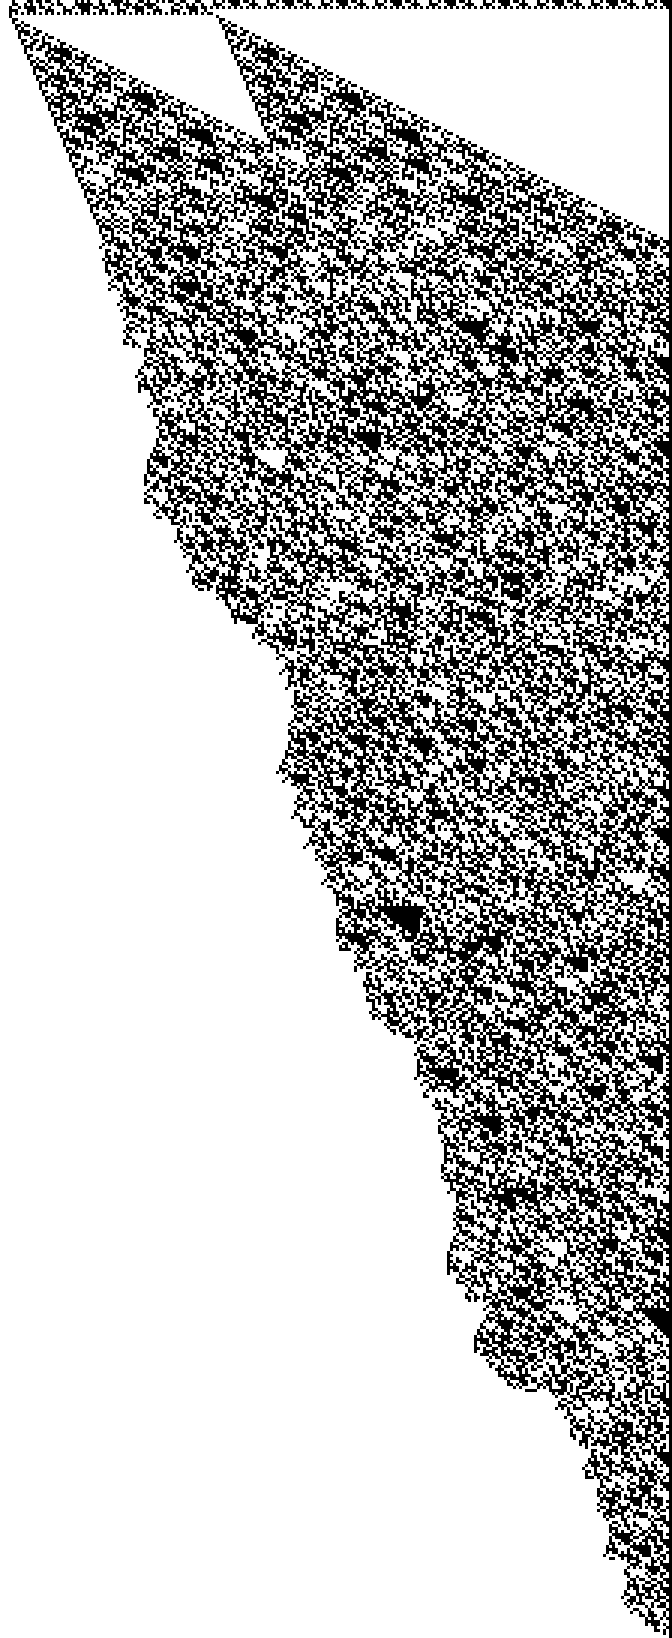

In [62]:
render_collatz(cool_program, 2)

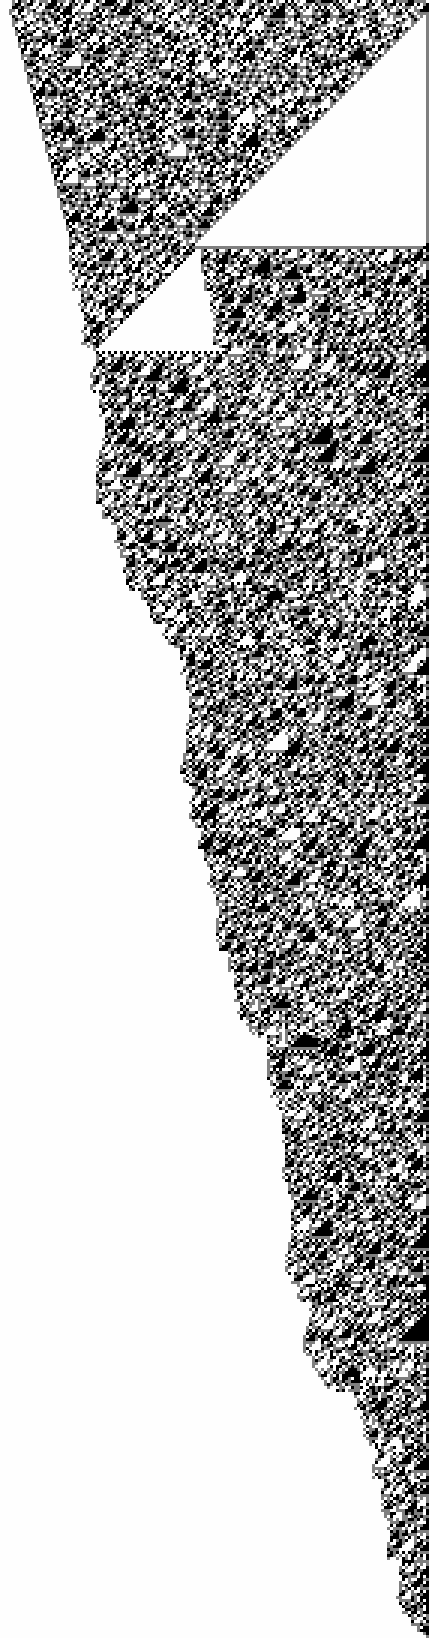

In [63]:
render_collatz(cool_program, 3)